In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19

# Define paths
train_folder = 'E:/Thesis/lip_train'
test_folder = 'E:/Thesis/lip'

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define image dimensions
image_width, image_height = 224, 224

# Preprocess and augment the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,        # Adjusted from 40
    width_shift_range=0.1,    # Adjusted from 0.2
    height_shift_range=0.1,   # Adjusted from 0.2
    shear_range=0.1,          # Adjusted from 0.2
    zoom_range=0.1,           # Adjusted from 0.2
    horizontal_flip=True,
    vertical_flip=False,      # Adjusted from True
    brightness_range=[0.9, 1.1], # Adjusted from [0.8, 1.2]
    fill_mode='nearest'
)

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented training data with validation split
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='training'
)

# Generate batches of validation data with validation split
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='validation'
)

# Generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed
)

# Load the VGG19 model pre-trained on ImageNet
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification layers on top
model = keras.models.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),  # Add batch normalization
    keras.layers.Dropout(0.5),  # Add dropout
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', 'precision', 'recall'])


history_vgg = model.fit(train_generator, epochs=20, validation_data=validation_generator)

loss, accuracy, precision, recall = model.evaluate(test_generator)

f1 = 2 * (precision * recall) / (precision + recall)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Found 5688 images belonging to 367 classes.
Found 1422 images belonging to 367 classes.
Found 711 images belonging to 367 classes.
Epoch 1/20


C:\Users\Hasib\.virtualenvs\Thesis-oLZqZqna\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 462s 3s/step - accuracy: 0.0110 - loss: 5.9347 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0331 - val_loss: 5.7874 - val_precision: 1.0000 - val_recall: 0.0021
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 530s 3s/step - accuracy: 0.0640 - loss: 5.1566 - precision: 0.7619 - recall: 0.0011 - val_accuracy: 0.1224 - val_loss: 4.6897 - val_precision: 1.0000 - val_recall: 0.0042
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.1263 - loss: 4.6146 - precision: 0.9255 - recall: 0.0055 - val_accuracy: 0.1871 - val_loss: 4.1954 - val_precision: 0.9310 - val_recall: 0.0190
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 554s 3s/step - accuracy: 0.1618 - loss: 4.2555 - precision: 0.8700 - recall: 0.0100 - val_accuracy: 0.2356 - val_loss: 3.6250 - val_precision: 0.9634 - val_recall: 0.0556
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 550s 3s/step - accuracy: 0.2116 - loss: 3.8836 - precision: 0.8680 - recall: 0.0299 - val_accuracy: 0.3305 - val_loss: 

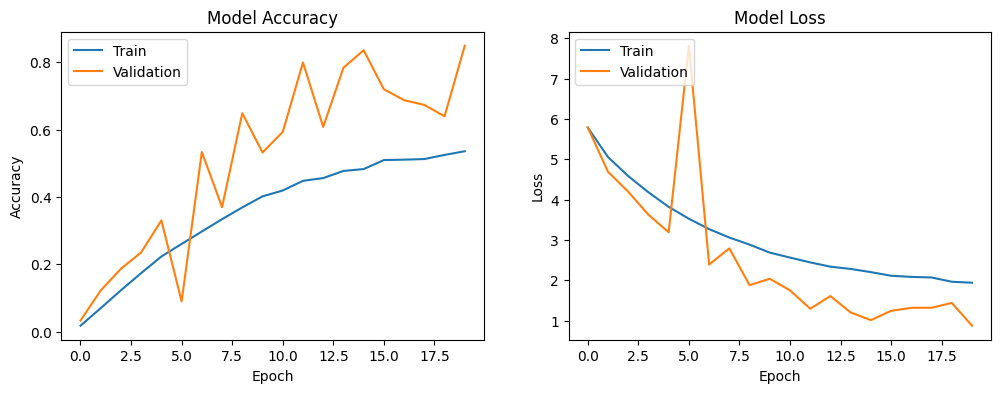

In [2]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


plot_metrics(history_vgg)

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Define paths
train_folder = 'E:/Thesis/lip_train'
test_folder = 'E:/Thesis/lip'

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define image dimensions
image_width, image_height = 224, 224

# Preprocess and augment the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,        # Adjusted from 40
    width_shift_range=0.1,    # Adjusted from 0.2
    height_shift_range=0.1,   # Adjusted from 0.2
    shear_range=0.1,          # Adjusted from 0.2
    zoom_range=0.1,           # Adjusted from 0.2
    horizontal_flip=True,
    vertical_flip=False,      # Adjusted from True
    brightness_range=[0.9, 1.1], # Adjusted from [0.8, 1.2]
    fill_mode='nearest'
)

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented training data with validation split
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='training'
)

# Generate batches of validation data with validation split
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed,
    subset='validation'
)

# Generate batches of test data
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    seed=seed
)

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification layers on top
model = keras.models.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),  # Add batch normalization
    keras.layers.Dropout(0.5),  # Add dropout
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', 'precision', 'recall'])

# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with validation data
history_vgg16 = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[early_stopping])


# Evaluate the model on the test data
loss, accuracy, precision, recall = model.evaluate(test_generator)

f1 = 2 * (precision * recall) / (precision + recall)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Found 5688 images belonging to 367 classes.
Found 1422 images belonging to 367 classes.
Found 711 images belonging to 367 classes.
Epoch 1/30


C:\Users\Hasib\.virtualenvs\Thesis-oLZqZqna\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.0099 - loss: 5.9414 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0323 - val_loss: 5.3422 - val_precision: 1.0000 - val_recall: 0.0014
Epoch 2/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.0728 - loss: 5.1149 - precision: 0.7428 - recall: 0.0015 - val_accuracy: 0.2250 - val_loss: 4.4394 - val_precision: 1.0000 - val_recall: 0.0077
Epoch 3/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.1412 - loss: 4.5413 - precision: 0.9216 - recall: 0.0067 - val_accuracy: 0.3312 - val_loss: 3.6277 - val_precision: 0.9818 - val_recall: 0.0380
Epoch 4/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.2048 - loss: 4.0666 - precision: 0.9611 - recall: 0.0204 - val_accuracy: 0.3235 - val_loss: 3.3885 - val_precision: 1.0000 - val_recall: 0.0788
Epoch 5/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.2551 - loss: 3.6995 - precision: 0.9136 - recall: 0.0354 - val_accuracy: 0.4831 - val_loss: 

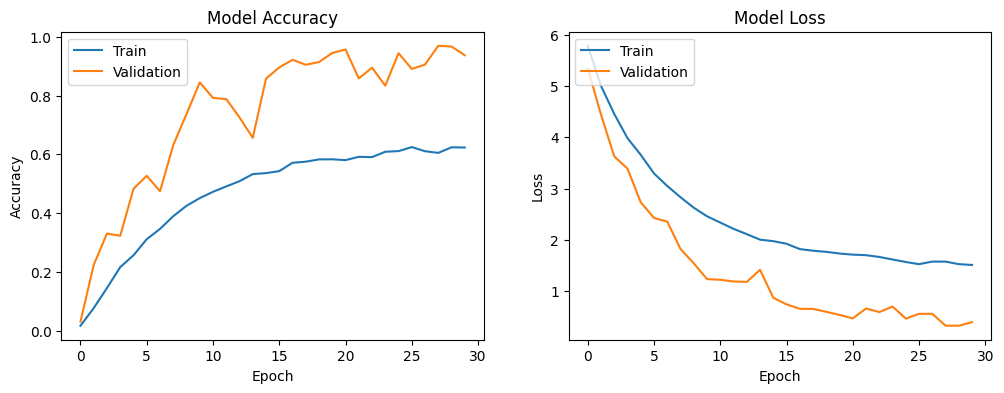

In [2]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


plot_metrics(history_vgg16)